# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

df = pd.read_excel('demo01.xlsx')
df.head(10)

X = df.drop('mau', axis=1)  # Features
y = df['mau']  # Variável resposta

# Separando 70% para treinamento e 30% para validação
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Exibindo as primeiras linhas de cada conjunto para verificar
print("Conjunto de Treinamento:")
print(X_train.head())

print("\nConjunto de Validação:")
print(X_valid.head())

Conjunto de Treinamento:
      sexo posse_de_veiculo posse_de_imovel  qtd_filhos            tipo_renda  \
965      F                N               Y           0               Working   
7874     M                Y               Y           2  Commercial associate   
10319    M                Y               Y           2             Pensioner   
8807     F                N               Y           0               Working   
438      F                N               Y           0               Working   

                            educacao    estado_civil    tipo_residencia  \
965    Secondary / secondary special         Married  House / apartment   
7874   Secondary / secondary special         Married  House / apartment   
10319               Higher education         Married   Office apartment   
8807                 Lower secondary  Civil marriage  House / apartment   
438    Secondary / secondary special         Married  House / apartment   

           idade  tempo_emprego  poss

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

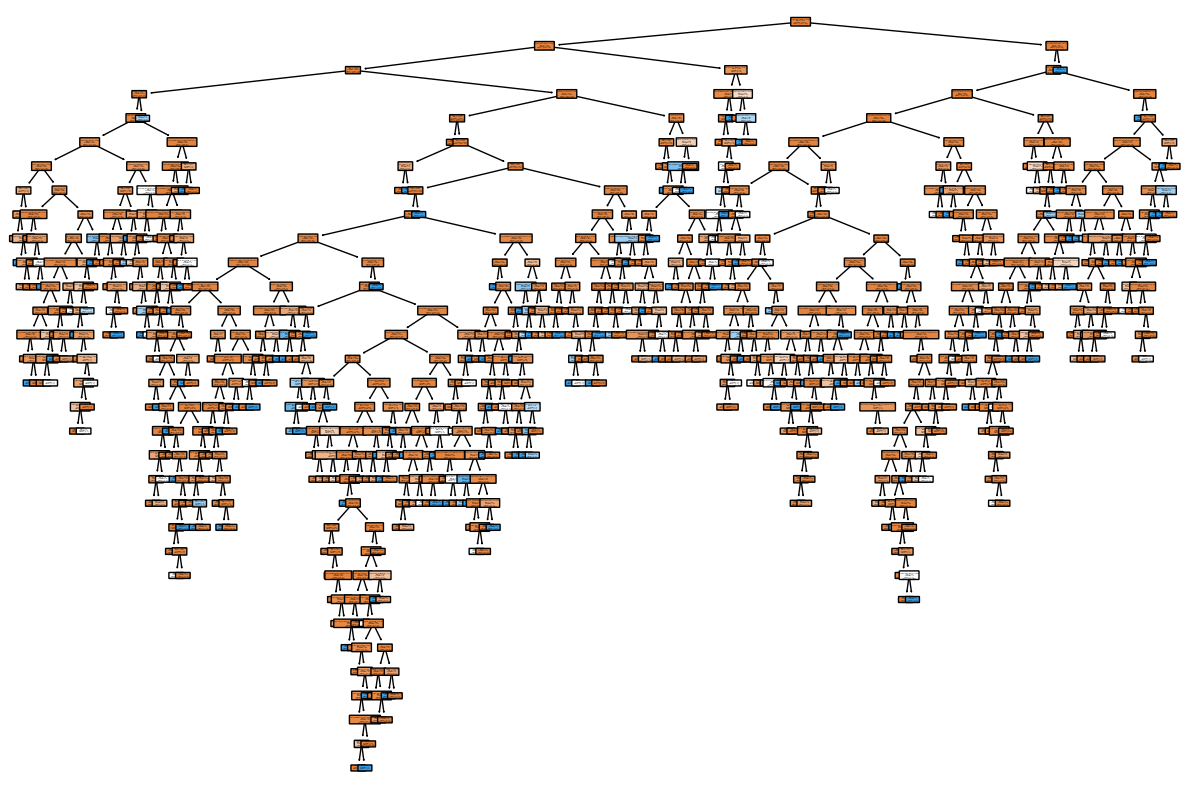

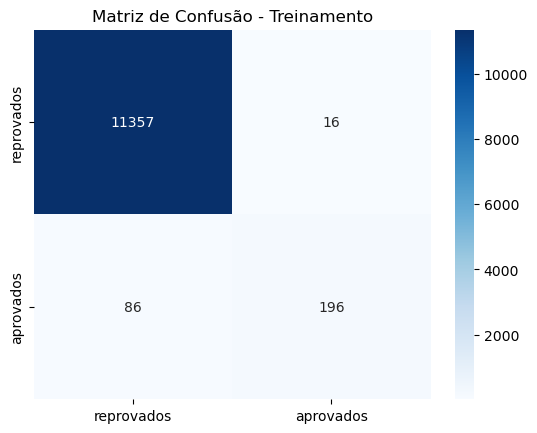

Acurácia na base de treinamento: 99.12%


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Selecionar variáveis explicativas e variável resposta
X = df.drop('mau', axis=1)
y = df['mau']

# Codificar todas as variáveis categóricas usando one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Dividir os dados em conjuntos de treinamento e validação
X_train, X_valid, y_train, y_valid = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Definir o objeto da árvore de decisão
modelo_arvore = DecisionTreeClassifier(random_state=42)

# Treinar o modelo com os dados de treinamento
modelo_arvore.fit(X_train, y_train)

# Visualizar a árvore
plt.figure(figsize=(15, 10))
from sklearn.tree import plot_tree
plot_tree(modelo_arvore, feature_names=X_encoded.columns, class_names=['reprovados', 'aprovados'], filled=True, rounded=True)
plt.show()

# Visualizar a matriz de confusão
y_pred_train = modelo_arvore.predict(X_train)
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['reprovados', 'aprovados'], yticklabels=['reprovados', 'aprovados'])
plt.title('Matriz de Confusão - Treinamento')
plt.show()

# Calcular a acurácia na base de treinamento
acuracia_treinamento = accuracy_score(y_train, y_pred_train)
print(f'Acurácia na base de treinamento: {acuracia_treinamento:.2%}')


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

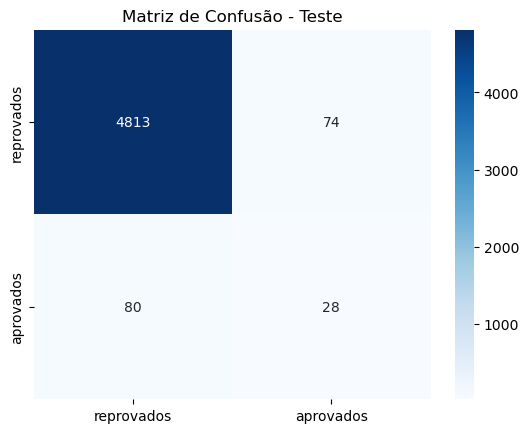

Acurácia na base de teste: 96.92%


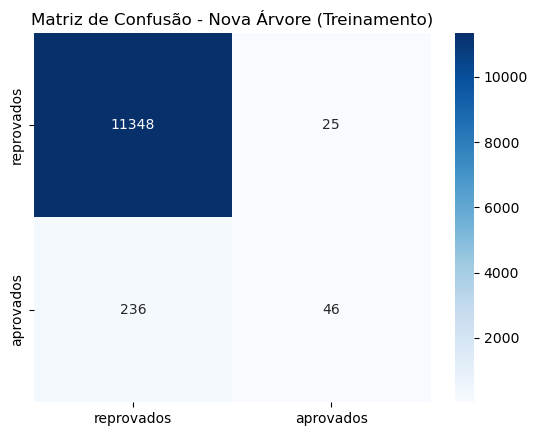

Proporção de proponentes classificados como "maus" na nova árvore: 0.61%
Acurácia na base de treinamento da nova árvore: 97.76%
Rótulos únicos em y_train: [False  True]
Acurácia ao classificar todos os contratos como "bons": 2.42%


In [22]:
# Classificar a base de teste com o modelo treinado anteriormente
y_pred_test = modelo_arvore.predict(X_valid)

# Visualizar a matriz de confusão para a base de teste
cm_test = confusion_matrix(y_valid, y_pred_test)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', xticklabels=['reprovados', 'aprovados'], yticklabels=['reprovados', 'aprovados'])
plt.title('Matriz de Confusão - Teste')
plt.show()

# Calcular a acurácia na base de teste
acuracia_teste = accuracy_score(y_valid, y_pred_test)
print(f'Acurácia na base de teste: {acuracia_teste:.2%}')

# Treinar uma nova árvore com parâmetros diferentes
modelo_arvore_nova = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
modelo_arvore_nova.fit(X_train, y_train)

# Visualizar a matriz de confusão para a nova árvore
y_pred_train_nova = modelo_arvore_nova.predict(X_train)
cm_nova = confusion_matrix(y_train, y_pred_train_nova)
sns.heatmap(cm_nova, annot=True, fmt='d', cmap='Blues', xticklabels=['reprovados', 'aprovados'], yticklabels=['reprovados', 'aprovados'])
plt.title('Matriz de Confusão - Nova Árvore (Treinamento)')
plt.show()

# Avaliar a proporção de proponentes classificados como 'maus' na nova árvore
proporcao_maus_nova_arvore = sum(y_pred_train_nova) / len(y_pred_train_nova)
print(f'Proporção de proponentes classificados como "maus" na nova árvore: {proporcao_maus_nova_arvore:.2%}')

# Calcular a acurácia na base de treinamento da nova árvore
acuracia_treinamento_nova_arvore = accuracy_score(y_train, y_pred_train_nova)
print(f'Acurácia na base de treinamento da nova árvore: {acuracia_treinamento_nova_arvore:.2%}')

# Calcular a acurácia se classificasse todos os contratos como 'bons'
print("Rótulos únicos em y_train:", y_train.unique())
acuracia_todos_bons = accuracy_score(y_train, [True] * len(y_train))
print(f'Acurácia ao classificar todos os contratos como "bons": {acuracia_todos_bons:.2%}')
